# Time Series Analysis and prediction

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Load the DataSet

The dataset used is a standard time series analysis dataset Air Passengers dataset. It has 2 columns month or time column and analysis column as the No of Passenger.

In [2]:
dataframe=pd.read_csv('AirPassengers.csv')

In [3]:
dataframe.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dataframe.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


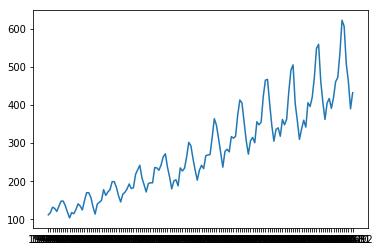

In [5]:
plt.plot(dataframe["Month"],dataframe["#Passengers"])
plt.show()

## Using Exponential Smoothing

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
model = ExponentialSmoothing(dataframe["#Passengers"])

In [33]:
model_fit = model.fit( optimized=True,use_boxcox=True, remove_bias=True)

In [34]:
pred=model_fit.predict()

In [42]:
pred

144    434.222222
dtype: float64

In [31]:
dataframe["#Passengers"][24]

145

## API Function

In [43]:
def time_series_predict(data,tolerance_level=10):
    '''
    The data must consist of only one column i.e. the time series data ordered in ascending order of their time. 
    The tolerance level is used to adust the upper and lower bound of the prediction. by default the tolearnce band is 
    considered as 10%.The output will be an array [predicted,upper_bound,lower_bound]
    '''
    temp_dict={}
    temp_dict['analysis']=data
    dataframe=pd.DataFrame(temp_dict)    
    model = ExponentialSmoothing(dataframe['analysis'])
    model_fit = model.fit( optimized=True,use_boxcox=True, remove_bias=True)
    pred=model_fit.predict()
    output=[pred]
    output.append(pred*1.1)
    output.append(pred*0.9)
    return output
    
    

In [47]:
time_series_predict(dataframe["#Passengers"])

[144    434.222222
 dtype: float64, 144    477.644444
 dtype: float64, 144    390.8
 dtype: float64]